In [2]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

import altair as alt
import matplotlib.pyplot as plt

In [3]:
df_base = pd.read_csv('to_train.csv')
df_wav = pd.read_csv('samples.csv')

In [4]:
df_base.shape #df con los mfcc's de cada muestra

(3000, 21)

In [5]:
df_wav.shape #df con el nombre de arhivo y el nº que dice en la muestra 

(3000, 3)

In [6]:
ext_col = df_wav[['File', 'Number']]
repeticion = list(range(1,51))*10*6 # numeramos la repetición de un mismo nº
df_base = pd.concat([ext_col, df_base], axis=1)
df_base.insert(2, 'rep', repeticion)

In [7]:
df_base

,File,Number,rep,name,mfcc0,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,...,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19
0,0_george_0.wav,0,1,george,-312.483826,157.413849,-83.389450,47.328335,47.099693,-55.105373,...,-24.018995,-43.016975,2.110411,-6.013774,-28.540850,-3.117069,-5.603108,-13.659479,-2.320226,-12.169437
1,0_george_1.wav,0,2,george,-379.066345,165.666901,-57.867474,22.860203,25.974346,-46.115276,...,-19.969303,-40.412582,-2.325323,-6.705203,-25.866652,-7.142958,-10.470287,-16.260077,-5.955035,-14.368776
2,0_george_10.wav,0,3,george,-424.772461,127.852097,-53.795578,17.831009,26.846817,-34.200123,...,-23.223995,-34.547401,-1.589133,-11.633971,-23.948620,-0.723396,-4.458993,-10.715401,-1.525208,-11.829735
3,0_george_11.wav,0,4,george,-389.584808,166.073517,-79.408005,25.375334,32.479534,-50.722202,...,-23.147619,-41.559254,-0.668476,-12.243627,-26.992029,1.255178,-5.872051,-13.653750,-2.406699,-15.252200
4,0_george_12.wav,0,5,george,-389.274689,169.632339,-77.210121,22.742558,36.415375,-46.292343,...,-21.835735,-41.768703,-1.458749,-10.668156,-28.250916,-1.996623,-7.960970,-16.239616,-3.517600,-17.073278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,9_yweweler_5.wav,9,46,yweweler,-539.953735,227.801041,-66.478615,1.908442,16.775307,-36.352470,...,10.374135,-23.454926,2.178336,0.333495,-16.196772,-3.123700,-9.697893,-11.340939,1.610538,-8.898899
2996,9_yweweler_6.wav,9,47,yweweler,-491.344299,227.619583,-87.590607,2.129326,22.445152,-49.015450,...,11.993781,-14.578753,5.613831,0.955333,-12.609158,-2.106348,-12.828856,-10.495636,5.215742,-9.894784
2997,9_yweweler_7.wav,9,48,yweweler,-511.855133,214.749985,-75.395142,1.426343,20.796366,-40.226170,...,6.611096,-17.942572,2.736619,-5.966835,-16.471325,-2.094696,-15.326060,-16.683109,-1.763444,-13.693180
2998,9_yweweler_8.wav,9,49,yweweler,-559.762512,231.914139,-70.128494,8.296725,18.100630,-42.547340,...,7.000213,-17.065546,7.002769,-3.895181,-14.850399,1.386613,-11.851810,-10.300099,6.005344,-9.889004


In [8]:
name_list = df_base['name'].unique()
number_list = df_base['Number'].unique()
rep_list = df_base['rep'].unique()

In [9]:
log_reg = LogisticRegression(max_iter=10000)

Hablantes       6   
Números         10  
Repeticiones    50

#### 2 hablantes, 10 números, 50 repeticiones

In [10]:
H = 2
N = 10
R = 50
filter_name_list = []
eval = []

for idx, e in enumerate(name_list):
    
    thiselem = e
    nextelem = name_list[(idx + 1) % len(name_list)]
    filter_name_list.append(thiselem)
    filter_name_list.append(nextelem)
    eval_prov = []
      
    df = df_base[df_base.name.isin(filter_name_list)]
    df['name'] = np.where(df['name'] == f'{filter_name_list[0]}', 1, 0)
    X = df.drop(columns = ['name','File','Number','rep'])
    y = df['name']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)
    log_reg.fit(X_train, y_train)
    y_pred=log_reg.predict(X_test)
    print('score',log_reg.score(X_test, y_test))
    print(filter_name_list)
    print('df',df.shape, 'X', X.shape, 'y', y.shape)
    y_pred = log_reg.predict(X_test)
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    print(cnf_matrix)
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("Precision:",metrics.precision_score(y_test, y_pred, zero_division=True))
    print("Recall:",metrics.recall_score(y_test, y_pred, zero_division=True))
    print("F1:",metrics.f1_score(y_test, y_pred, zero_division=True))
    eval_prov.extend([filter_name_list, log_reg.score(X_test, y_test), metrics.accuracy_score(y_test, y_pred), metrics.precision_score(y_test, y_pred, zero_division=True), metrics.recall_score(y_test, y_pred, zero_division=True), metrics.f1_score(y_test, y_pred, zero_division=True)])
    eval.append(eval_prov)
    print('-----------')
    filter_name_list = [] #<--------------reset

# DF con los resultados
df2_10_50 = pd.DataFrame(eval, columns= ['Names', 'Score', 'Accuracy', 'Precision', 'Recall', 'F1'])

C:\Users\Victor\AppData\Local\Temp/ipykernel_19940/1633116929.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['name'] = np.where(df['name'] == f'{filter_name_list[0]}', 1, 0)
C:\Users\Victor\AppData\Local\Temp/ipykernel_19940/1633116929.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['name'] = np.where(df['name'] == f'{filter_name_list[0]}', 1, 0)


score 1.0
['george', 'jackson']
df (1000, 24) X (1000, 20) y (1000,)
[[ 94   0]
 [  0 106]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0
-----------
score 1.0
['jackson', 'lucas']
df (1000, 24) X (1000, 20) y (1000,)
[[ 94   0]
 [  0 106]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0
-----------
score 1.0
['lucas', 'nicolas']
df (1000, 24) X (1000, 20) y (1000,)


C:\Users\Victor\AppData\Local\Temp/ipykernel_19940/1633116929.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['name'] = np.where(df['name'] == f'{filter_name_list[0]}', 1, 0)
C:\Users\Victor\AppData\Local\Temp/ipykernel_19940/1633116929.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['name'] = np.where(df['name'] == f'{filter_name_list[0]}', 1, 0)
C:\Users\Victor\AppData\Local\Temp/ipykernel_19940/1633116929.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

[[ 94   0]
 [  0 106]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0
-----------
score 1.0
['nicolas', 'theo']
df (1000, 24) X (1000, 20) y (1000,)
[[ 94   0]
 [  0 106]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0
-----------
score 0.99
['theo', 'yweweler']
df (1000, 24) X (1000, 20) y (1000,)
[[ 94   0]
 [  2 104]]
Accuracy: 0.99
Precision: 1.0
Recall: 0.9811320754716981
F1: 0.9904761904761905
-----------
score 1.0
['yweweler', 'george']
df (1000, 24) X (1000, 20) y (1000,)
[[106   0]
 [  0  94]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0
-----------


C:\Users\Victor\AppData\Local\Temp/ipykernel_19940/1633116929.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['name'] = np.where(df['name'] == f'{filter_name_list[0]}', 1, 0)


#### 2 hablantes, 5 números, 50 repeticiones

In [11]:
H = 2
N = 5
R = 50
filter_name_list = []
eval = []

for idx, e in enumerate(name_list):
    
    thiselem = e
    nextelem = name_list[(idx + 1) % len(name_list)]
    filter_name_list.append(thiselem)
    filter_name_list.append(nextelem)
    eval_prov = []
      
    df = df_base[df_base.name.isin(filter_name_list)]
    df = df[df.Number < 6]
    df['name'] = np.where(df['name'] == f'{filter_name_list[0]}', 1, 0)
    X = df.drop(columns = ['name','File','Number','rep'])
    y = df['name']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)
    log_reg.fit(X_train, y_train)
    y_pred=log_reg.predict(X_test)
    print('score',log_reg.score(X_test, y_test))
    print(filter_name_list)
    print('df',df.shape, 'X', X.shape, 'y', y.shape)
    y_pred = log_reg.predict(X_test)
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    print(cnf_matrix)
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("Precision:",metrics.precision_score(y_test, y_pred, zero_division=True))
    print("Recall:",metrics.recall_score(y_test, y_pred, zero_division=True))
    print("F1:",metrics.f1_score(y_test, y_pred, zero_division=True))
    eval_prov.extend([filter_name_list, log_reg.score(X_test, y_test), metrics.accuracy_score(y_test, y_pred), metrics.precision_score(y_test, y_pred, zero_division=True), metrics.recall_score(y_test, y_pred, zero_division=True), metrics.f1_score(y_test, y_pred, zero_division=True)])
    eval.append(eval_prov)
    print('-----------')
    filter_name_list = [] #<--------------reset

# DF con los resultados
df2_5_50 = pd.DataFrame(eval, columns= ['Names', 'Score', 'Accuracy', 'Precision', 'Recall', 'F1'])

score 1.0
['george', 'jackson']
df (600, 24) X (600, 20) y (600,)
[[67  0]
 [ 0 53]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0
-----------
score 0.9916666666666667
['jackson', 'lucas']
df (600, 24) X (600, 20) y (600,)
[[66  1]
 [ 0 53]]
Accuracy: 0.9916666666666667
Precision: 0.9814814814814815
Recall: 1.0
F1: 0.9906542056074767
-----------
score 1.0
['lucas', 'nicolas']
df (600, 24) X (600, 20) y (600,)
[[67  0]
 [ 0 53]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0
-----------
score 1.0
['nicolas', 'theo']
df (600, 24) X (600, 20) y (600,)
[[67  0]
 [ 0 53]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0
-----------
score 0.9916666666666667
['theo', 'yweweler']
df (600, 24) X (600, 20) y (600,)
[[67  0]
 [ 1 52]]
Accuracy: 0.9916666666666667
Precision: 1.0
Recall: 0.9811320754716981
F1: 0.9904761904761905
-----------
score 1.0
['yweweler', 'george']
df (600, 24) X (600, 20) y (600,)
[[53  0]
 [ 0 67]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0
-----------


#### 2 hablantes, 5 números, 25 repeticiones

In [12]:
H = 2
N = 5
R = 25
filter_name_list = []
eval = []

for idx, e in enumerate(name_list):
    
    thiselem = e
    nextelem = name_list[(idx + 1) % len(name_list)]
    filter_name_list.append(thiselem)
    filter_name_list.append(nextelem)
    eval_prov = []
      
    df = df_base[df_base.name.isin(filter_name_list)]
    df = df[df.Number < 6]
    df = df[df.rep < 26]
    df['name'] = np.where(df['name'] == f'{filter_name_list[0]}', 1, 0)
    X = df.drop(columns = ['name','File','Number','rep'])
    y = df['name']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)
    log_reg.fit(X_train, y_train)
    y_pred=log_reg.predict(X_test)
    print('score',log_reg.score(X_test, y_test))
    print(filter_name_list)
    print('df',df.shape, 'X', X.shape, 'y', y.shape)
    y_pred = log_reg.predict(X_test)
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    print(cnf_matrix)
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("Precision:",metrics.precision_score(y_test, y_pred, zero_division=True))
    print("Recall:",metrics.recall_score(y_test, y_pred, zero_division=True))
    print("F1:",metrics.f1_score(y_test, y_pred, zero_division=True))
    eval_prov.extend([filter_name_list, log_reg.score(X_test, y_test), metrics.accuracy_score(y_test, y_pred), metrics.precision_score(y_test, y_pred, zero_division=True), metrics.recall_score(y_test, y_pred, zero_division=True), metrics.f1_score(y_test, y_pred, zero_division=True)])
    eval.append(eval_prov)
    print('-----------')
    filter_name_list = [] #<--------------reset

# DF con los resultados
df2_5_25 = pd.DataFrame(eval, columns= ['Names', 'Score', 'Accuracy', 'Precision', 'Recall', 'F1'])

score 1.0
['george', 'jackson']
df (300, 24) X (300, 20) y (300,)
[[34  0]
 [ 0 26]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0
-----------
score 1.0
['jackson', 'lucas']
df (300, 24) X (300, 20) y (300,)
[[34  0]
 [ 0 26]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0
-----------
score 1.0
['lucas', 'nicolas']
df (300, 24) X (300, 20) y (300,)
[[34  0]
 [ 0 26]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0
-----------
score 1.0
['nicolas', 'theo']
df (300, 24) X (300, 20) y (300,)
[[34  0]
 [ 0 26]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0
-----------
score 0.9833333333333333
['theo', 'yweweler']
df (300, 24) X (300, 20) y (300,)
[[34  0]
 [ 1 25]]
Accuracy: 0.9833333333333333
Precision: 1.0
Recall: 0.9615384615384616
F1: 0.9803921568627451
-----------
score 1.0
['yweweler', 'george']
df (300, 24) X (300, 20) y (300,)
[[26  0]
 [ 0 34]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0
-----------


#### 2 hablantes, 5 números, 1 repeticiones

In [13]:
H = 2
N = 5
R = 1
filter_name_list = []
eval = []

for idx, e in enumerate(name_list):
    
    thiselem = e
    nextelem = name_list[(idx + 1) % len(name_list)]
    filter_name_list.append(thiselem)
    filter_name_list.append(nextelem)
    eval_prov = []
      
    df = df_base[df_base.name.isin(filter_name_list)]
    df = df[df.Number < 5]
    df = df[df.rep < 2]
    df['name'] = np.where(df['name'] == f'{filter_name_list[0]}', 1, 0)
    X = df.drop(columns = ['name','File','Number','rep'])
    y = df['name']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)
    log_reg.fit(X_train, y_train)
    y_pred=log_reg.predict(X_test)
    print('score',log_reg.score(X_test, y_test))
    print(filter_name_list)
    print('df',df.shape, 'X', X.shape, 'y', y.shape)
    y_pred = log_reg.predict(X_test)
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    print(cnf_matrix)
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("Precision:",metrics.precision_score(y_test, y_pred, zero_division=True))
    print("Recall:",metrics.recall_score(y_test, y_pred, zero_division=True))
    print("F1:",metrics.f1_score(y_test, y_pred, zero_division=True))
    eval_prov.extend([filter_name_list, log_reg.score(X_test, y_test), metrics.accuracy_score(y_test, y_pred), metrics.precision_score(y_test, y_pred, zero_division=True), metrics.recall_score(y_test, y_pred, zero_division=True), metrics.f1_score(y_test, y_pred, zero_division=True)])
    eval.append(eval_prov)
    print('-----------')
    filter_name_list = [] #<--------------reset

# DF con los resultados
df2_5_1 = pd.DataFrame(eval, columns= ['Names', 'Score', 'Accuracy', 'Precision', 'Recall', 'F1'])


score 1.0
['george', 'jackson']
df (10, 24) X (10, 20) y (10,)
[[2]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0
-----------
score 0.5
['jackson', 'lucas']
df (10, 24) X (10, 20) y (10,)
[[1 1]
 [0 0]]
Accuracy: 0.5
Precision: 0.0
Recall: 1.0
F1: 0.0
-----------
score 1.0
['lucas', 'nicolas']
df (10, 24) X (10, 20) y (10,)
[[2]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0
-----------
score 1.0
['nicolas', 'theo']
df (10, 24) X (10, 20) y (10,)
[[2]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0
-----------
score 1.0
['theo', 'yweweler']
df (10, 24) X (10, 20) y (10,)
[[2]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0
-----------
score 1.0
['yweweler', 'george']
df (10, 24) X (10, 20) y (10,)
[[2]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0
-----------


#### 6 hablantes, 10 números, 50 repeticiones

In [26]:
H = 6
N = 10
R = 50
filter_name_list = name_list
eval = []
sospechoso = 'george'
eval_prov = []
      
df = df_base[df_base.name.isin(filter_name_list)]
df = df[df.Number < 11]
df = df[df.rep < 51]
df['name'] = np.where(df['name'] == f'{sospechoso}', 1, 0)
X = df.drop(columns = ['name','File','Number','rep'])
y = df['name']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)
log_reg.fit(X_train, y_train)
y_pred=log_reg.predict(X_test)
print('score',log_reg.score(X_test, y_test))
print(filter_name_list)
print('df',df.shape, 'X', X.shape, 'y', y.shape)
y_pred = log_reg.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, zero_division=True))
print("Recall:",metrics.recall_score(y_test, y_pred, zero_division=True))
print("F1:",metrics.f1_score(y_test, y_pred, zero_division=True))
eval_prov.extend([filter_name_list, log_reg.score(X_test, y_test), metrics.accuracy_score(y_test, y_pred), metrics.precision_score(y_test, y_pred, zero_division=True), metrics.recall_score(y_test, y_pred, zero_division=True), metrics.f1_score(y_test, y_pred, zero_division=True)])
eval.append(eval_prov)
print('-----------')
filter_name_list = [] #<--------------reset

# DF con los resultados
df2_5_1 = pd.DataFrame(eval, columns= ['Names', 'Score', 'Accuracy', 'Precision', 'Recall', 'F1'])

score 0.9983333333333333
['george' 'jackson' 'lucas' 'nicolas' 'theo' 'yweweler']
df (3000, 24) X (3000, 20) y (3000,)
[[514   0]
 [  1  85]]
Accuracy: 0.9983333333333333
Precision: 1.0
Recall: 0.9883720930232558
F1: 0.9941520467836257
-----------


#### 6 hablantes, 10 números, 25 repeticiones

In [27]:
H = 6
N = 10
R = 50
filter_name_list = name_list
eval = []
sospechoso = 'george'
eval_prov = []
      
df = df_base[df_base.name.isin(filter_name_list)]
df = df[df.Number < 11]
df = df[df.rep < 26]
df['name'] = np.where(df['name'] == f'{sospechoso}', 1, 0)
X = df.drop(columns = ['name','File','Number','rep'])
y = df['name']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)
log_reg.fit(X_train, y_train)
y_pred=log_reg.predict(X_test)
print('score',log_reg.score(X_test, y_test))
print(filter_name_list)
print('df',df.shape, 'X', X.shape, 'y', y.shape)
y_pred = log_reg.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, zero_division=True))
print("Recall:",metrics.recall_score(y_test, y_pred, zero_division=True))
print("F1:",metrics.f1_score(y_test, y_pred, zero_division=True))
eval_prov.extend([filter_name_list, log_reg.score(X_test, y_test), metrics.accuracy_score(y_test, y_pred), metrics.precision_score(y_test, y_pred, zero_division=True), metrics.recall_score(y_test, y_pred, zero_division=True), metrics.f1_score(y_test, y_pred, zero_division=True)])
eval.append(eval_prov)
print('-----------')
filter_name_list = [] #<--------------reset

# DF con los resultados
df2_5_1 = pd.DataFrame(eval, columns= ['Names', 'Score', 'Accuracy', 'Precision', 'Recall', 'F1'])

score 1.0
['george' 'jackson' 'lucas' 'nicolas' 'theo' 'yweweler']
df (1500, 24) X (1500, 20) y (1500,)
[[254   0]
 [  0  46]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0
-----------


#### 6 hablantes, 5 números, 50 repeticiones

In [28]:
H = 6
N = 10
R = 50
filter_name_list = name_list
eval = []
sospechoso = 'george'
eval_prov = []
      
df = df_base[df_base.name.isin(filter_name_list)]
df = df[df.Number < 5]
df = df[df.rep < 51]
df['name'] = np.where(df['name'] == f'{sospechoso}', 1, 0)
X = df.drop(columns = ['name','File','Number','rep'])
y = df['name']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)
log_reg.fit(X_train, y_train)
y_pred=log_reg.predict(X_test)
print('score',log_reg.score(X_test, y_test))
print(filter_name_list)
print('df',df.shape, 'X', X.shape, 'y', y.shape)
y_pred = log_reg.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, zero_division=True))
print("Recall:",metrics.recall_score(y_test, y_pred, zero_division=True))
print("F1:",metrics.f1_score(y_test, y_pred, zero_division=True))
eval_prov.extend([filter_name_list, log_reg.score(X_test, y_test), metrics.accuracy_score(y_test, y_pred), metrics.precision_score(y_test, y_pred, zero_division=True), metrics.recall_score(y_test, y_pred, zero_division=True), metrics.f1_score(y_test, y_pred, zero_division=True)])
eval.append(eval_prov)
print('-----------')
filter_name_list = [] #<--------------reset

# DF con los resultados
df2_5_1 = pd.DataFrame(eval, columns= ['Names', 'Score', 'Accuracy', 'Precision', 'Recall', 'F1'])

score 1.0
['george' 'jackson' 'lucas' 'nicolas' 'theo' 'yweweler']
df (1500, 24) X (1500, 20) y (1500,)
[[246   0]
 [  0  54]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0
-----------


#### 6 hablantes, 10 números, 50 repeticiones

In [29]:
H = 6
N = 5
R = 25
filter_name_list = name_list
eval = []
sospechoso = 'george'
eval_prov = []
      
df = df_base[df_base.name.isin(filter_name_list)]
df = df[df.Number < 5]
df = df[df.rep < 26]
df['name'] = np.where(df['name'] == f'{sospechoso}', 1, 0)
X = df.drop(columns = ['name','File','Number','rep'])
y = df['name']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)
log_reg.fit(X_train, y_train)
y_pred=log_reg.predict(X_test)
print('score',log_reg.score(X_test, y_test))
print(filter_name_list)
print('df',df.shape, 'X', X.shape, 'y', y.shape)
y_pred = log_reg.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, zero_division=True))
print("Recall:",metrics.recall_score(y_test, y_pred, zero_division=True))
print("F1:",metrics.f1_score(y_test, y_pred, zero_division=True))
eval_prov.extend([filter_name_list, log_reg.score(X_test, y_test), metrics.accuracy_score(y_test, y_pred), metrics.precision_score(y_test, y_pred, zero_division=True), metrics.recall_score(y_test, y_pred, zero_division=True), metrics.f1_score(y_test, y_pred, zero_division=True)])
eval.append(eval_prov)
print('-----------')
filter_name_list = [] #<--------------reset

# DF con los resultados
df2_5_1 = pd.DataFrame(eval, columns= ['Names', 'Score', 'Accuracy', 'Precision', 'Recall', 'F1'])

score 1.0
['george' 'jackson' 'lucas' 'nicolas' 'theo' 'yweweler']
df (750, 24) X (750, 20) y (750,)
[[126   0]
 [  0  24]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0
-----------


#### 6 hablantes, 1 números, 1 repeticiones

In [30]:
H = 6
N = 10
R = 50
filter_name_list = name_list
eval = []
sospechoso = 'george'
eval_prov = []
      
df = df_base[df_base.name.isin(filter_name_list)]
df = df[df.Number < 1]
df = df[df.rep < 2]
df['name'] = np.where(df['name'] == f'{sospechoso}', 1, 0)
X = df.drop(columns = ['name','File','Number','rep'])
y = df['name']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)
log_reg.fit(X_train, y_train)
y_pred=log_reg.predict(X_test)
print('score',log_reg.score(X_test, y_test))
print(filter_name_list)
print('df',df.shape, 'X', X.shape, 'y', y.shape)
y_pred = log_reg.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, zero_division=True))
print("Recall:",metrics.recall_score(y_test, y_pred, zero_division=True))
print("F1:",metrics.f1_score(y_test, y_pred, zero_division=True))
eval_prov.extend([filter_name_list, log_reg.score(X_test, y_test), metrics.accuracy_score(y_test, y_pred), metrics.precision_score(y_test, y_pred, zero_division=True), metrics.recall_score(y_test, y_pred, zero_division=True), metrics.f1_score(y_test, y_pred, zero_division=True)])
eval.append(eval_prov)
print('-----------')
filter_name_list = [] #<--------------reset

# DF con los resultados
df2_5_1 = pd.DataFrame(eval, columns= ['Names', 'Score', 'Accuracy', 'Precision', 'Recall', 'F1'])

score 1.0
['george' 'jackson' 'lucas' 'nicolas' 'theo' 'yweweler']
df (6, 24) X (6, 20) y (6,)
[[2]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0
-----------


In [31]:
X

,mfcc0,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19
0,-312.483826,157.413849,-83.389450,47.328335,47.099693,-55.105373,-13.754276,-17.003675,-52.974422,-11.805694,-24.018995,-43.016975,2.110411,-6.013774,-28.540850,-3.117069,-5.603108,-13.659479,-2.320226,-12.169437
50,-296.009003,189.521942,-19.561626,5.975770,21.727133,-19.727306,-11.294458,-17.585110,-25.275646,-3.106214,-15.759282,-25.853756,-4.967067,-8.271612,-10.646009,-0.326596,-8.905789,-4.626853,2.682958,-15.640623
100,-418.891876,170.488480,-52.474487,22.670088,45.866615,-27.460943,-5.300677,6.743768,-20.062475,-0.733625,0.821834,-14.394647,3.033844,1.778942,-9.995108,0.761503,-0.289756,-3.960740,1.738439,-6.613360
150,-351.088837,187.639999,-44.433075,52.947926,40.188976,-35.502525,15.398341,-1.946302,-33.459179,8.677947,-13.234729,-30.366337,8.023765,-4.558068,-12.099520,9.820096,-4.381166,-4.482807,6.903914,-7.653182
200,-576.711243,217.080658,-63.095062,31.174772,41.515213,-29.768784,8.770526,-13.700604,-38.240849,11.003427,-10.010005,-26.783829,10.332186,-6.409000,-11.447975,12.805031,-7.976996,-8.193677,7.407241,-12.685074
250,-514.563904,220.498505,-43.082123,-0.537246,18.519053,-36.573898,-6.555985,-1.250406,-26.166458,-4.327130,-7.819176,-19.323647,3.782815,0.067061,-11.335880,-0.572437,-3.770851,-3.348225,3.257211,-7.338062


In [32]:
y

0      1
50     0
100    0
150    0
200    0
250    0
Name: name, dtype: int32

In [33]:
X_test

,mfcc0,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19
250,-514.563904,220.498505,-43.082123,-0.537246,18.519053,-36.573898,-6.555985,-1.250406,-26.166458,-4.327130,-7.819176,-19.323647,3.782815,0.067061,-11.335880,-0.572437,-3.770851,-3.348225,3.257211,-7.338062
100,-418.891876,170.488480,-52.474487,22.670088,45.866615,-27.460943,-5.300677,6.743768,-20.062475,-0.733625,0.821834,-14.394647,3.033844,1.778942,-9.995108,0.761503,-0.289756,-3.960740,1.738439,-6.613360


In [34]:
y_test

250    0
100    0
Name: name, dtype: int32

In [36]:
X_train

,mfcc0,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19
200,-576.711243,217.080658,-63.095062,31.174772,41.515213,-29.768784,8.770526,-13.700604,-38.240849,11.003427,-10.010005,-26.783829,10.332186,-6.409000,-11.447975,12.805031,-7.976996,-8.193677,7.407241,-12.685074
50,-296.009003,189.521942,-19.561626,5.975770,21.727133,-19.727306,-11.294458,-17.585110,-25.275646,-3.106214,-15.759282,-25.853756,-4.967067,-8.271612,-10.646009,-0.326596,-8.905789,-4.626853,2.682958,-15.640623
0,-312.483826,157.413849,-83.389450,47.328335,47.099693,-55.105373,-13.754276,-17.003675,-52.974422,-11.805694,-24.018995,-43.016975,2.110411,-6.013774,-28.540850,-3.117069,-5.603108,-13.659479,-2.320226,-12.169437
150,-351.088837,187.639999,-44.433075,52.947926,40.188976,-35.502525,15.398341,-1.946302,-33.459179,8.677947,-13.234729,-30.366337,8.023765,-4.558068,-12.099520,9.820096,-4.381166,-4.482807,6.903914,-7.653182


In [37]:
y_train

200    0
50     0
0      1
150    0
Name: name, dtype: int32

In [39]:
dir(log_reg)

['C',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_feature_names',
 '_check_n_features',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_predict_proba_lr',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 'class_weight',
 'classes_',
 'coef_',
 'decision_function',
 'densify',
 'dual',
 'feature_names_in_',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'intercept_scaling',
 'l1_ratio',
 'max_iter',
 'multi_class',
 'n_features_in_',
 'n_iter_',
 'n_jobs',
 'penalty',
 'predict',
 'predict_log_proba',
 'predict_proba',
 'random_state',
 'score',
 'set_params',


In [41]:
log_reg.feature_names_in_

array(['mfcc0', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6',
       'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13',
       'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19'],
      dtype=object)

In [43]:
ressult = log_reg.fit(X_train, y_train)

In [45]:
log_reg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 10000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

array([[ 0.02315884, -0.0453435 , -0.09778502,  0.01486353,  0.02701655,
        -0.05223981, -0.04802281, -0.02491129, -0.04832545, -0.03715903,
        -0.02309915, -0.03197724, -0.00590751, -0.00188039, -0.03666509,
        -0.02183117, -0.00098411, -0.01974648, -0.01689317, -0.00673071]])

### Resultados

In [ ]:
df2_10_50

,Names,Score,Accuracy,Precision,Recall,F1
0,"[george, jackson]",1.00,1.00,1.0,1.000000,1.000000
1,"[jackson, lucas]",1.00,1.00,1.0,1.000000,1.000000
2,"[lucas, nicolas]",1.00,1.00,1.0,1.000000,1.000000
3,"[nicolas, theo]",1.00,1.00,1.0,1.000000,1.000000
4,"[theo, yweweler]",0.99,0.99,1.0,0.981132,0.990476
5,"[yweweler, george]",1.00,1.00,1.0,1.000000,1.000000


In [ ]:
df2_5_50

,Names,Score,Accuracy,Precision,Recall,F1
0,"[george, jackson]",1.000000,1.000000,1.000000,1.000000,1.000000
1,"[jackson, lucas]",0.991667,0.991667,0.981481,1.000000,0.990654
2,"[lucas, nicolas]",1.000000,1.000000,1.000000,1.000000,1.000000
3,"[nicolas, theo]",1.000000,1.000000,1.000000,1.000000,1.000000
4,"[theo, yweweler]",0.991667,0.991667,1.000000,0.981132,0.990476
5,"[yweweler, george]",1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df2_5_25

,Names,Score,Accuracy,Precision,Recall,F1
0,"[george, jackson]",1.000000,1.000000,1.0,1.000000,1.000000
1,"[jackson, lucas]",1.000000,1.000000,1.0,1.000000,1.000000
2,"[lucas, nicolas]",1.000000,1.000000,1.0,1.000000,1.000000
3,"[nicolas, theo]",1.000000,1.000000,1.0,1.000000,1.000000
4,"[theo, yweweler]",0.983333,0.983333,1.0,0.961538,0.980392
5,"[yweweler, george]",1.000000,1.000000,1.0,1.000000,1.000000


In [ ]:
df2_5_1

,Names,Score,Accuracy,Precision,Recall,F1
0,"[george, jackson]",1.0,1.0,1.0,1.0,1.0
1,"[jackson, lucas]",0.5,0.5,0.0,1.0,0.0
2,"[lucas, nicolas]",1.0,1.0,1.0,1.0,1.0
3,"[nicolas, theo]",1.0,1.0,1.0,1.0,1.0
4,"[theo, yweweler]",1.0,1.0,1.0,1.0,1.0
5,"[yweweler, george]",1.0,1.0,1.0,1.0,1.0


<function matplotlib.pyplot.show(close=None, block=None)>

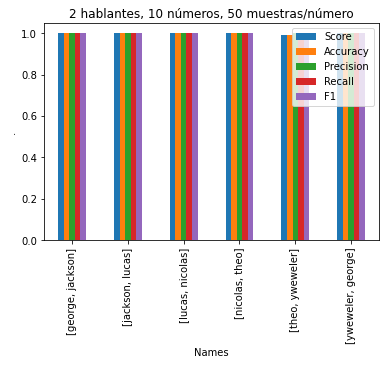

In [ ]:
graph = df2_10_50.plot(x='Names', y=['Score', 'Accuracy', 'Precision', 'Recall', 'F1'], kind='bar')
#chart2 = df2_5_50.plotmark_bar().encode(x='Names', ='Score')
#chart3 = df2_5_25.plotmark_bar().encode(x='Names', y'Score')
#chart4 = df2_5_1.plotark_bar().encode(x='Names', y='ore')

plt.title('2 hablantes, 10 números, 50 muestras/número')
plt.xlabel('Names')
plt.ylabel('.')


plt.show


In [ ]:
chart1 = alt.Chart(df2_10_50).mark_bar().encode(x='Names', y='Score')
chart2 = alt.Chart(df2_5_50).mark_bar().encode(x='Names', y='Score')
chart3 = alt.Chart(df2_5_25).mark_bar().encode(x='Names', y='Score')
chart4 = alt.Chart(df2_5_1).mark_bar().encode(x='Names', y='Score')




chart1+chart2+chart3+chart4

alt.LayerChart(...)